In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:


start = '2012-01-01'
end = '2025-03-21'
stock = "NIFTYBEES.NS"

data = yf.download(stock, start, end)

# Debug checks
if data.empty:
    print("❌ No data was downloaded. Check your ticker symbol, internet, or date range.")
else:
    print("✅ Data downloaded successfully.")
    print(data.head())
    print("Shape:", data.shape)
    print("Columns:", data.columns)


C:\Users\anand\AppData\Local\Temp\ipykernel_1456\1068292750.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(stock, start, end)
[*********************100%***********************]  1 of 1 completed

✅ Data downloaded successfully.
Price             Close         High          Low         Open       Volume
Ticker     NIFTYBEES.NS NIFTYBEES.NS NIFTYBEES.NS NIFTYBEES.NS NIFTYBEES.NS
Date                                                                       
2012-01-02    47.178001    47.299999    46.750000    47.299999       496610
2012-01-03    48.508999    48.599998    47.400002    47.400002       423790
2012-01-04    48.348999    48.599998    48.055000    48.401001       708290
2012-01-05    48.348999    48.598999    48.111000    48.311001       311630
2012-01-06    48.483002    48.889999    47.720001    48.224998       450240
Shape: (3259, 5)
Columns: MultiIndex([( 'Close', 'NIFTYBEES.NS'),
            (  'High', 'NIFTYBEES.NS'),
            (   'Low', 'NIFTYBEES.NS'),
            (  'Open', 'NIFTYBEES.NS'),
            ('Volume', 'NIFTYBEES.NS')],
           names=['Price', 'Ticker'])


In [3]:
data


Price,Close,High,Low,Open,Volume
Ticker,NIFTYBEES.NS,NIFTYBEES.NS,NIFTYBEES.NS,NIFTYBEES.NS,NIFTYBEES.NS
Date,,,,,
2012-01-02,47.178001,47.299999,46.750000,47.299999,496610
2012-01-03,48.508999,48.599998,47.400002,47.400002,423790
2012-01-04,48.348999,48.599998,48.055000,48.401001,708290
2012-01-05,48.348999,48.598999,48.111000,48.311001,311630
2012-01-06,48.483002,48.889999,47.720001,48.224998,450240
...,...,...,...,...,...
2025-03-13,251.059998,252.899994,250.800003,252.899994,3161426
2025-03-17,252.179993,253.000000,250.100006,251.059998,3872869


In [4]:
data.reset_index(inplace=True)

In [5]:
ma_100_days = data.Close.rolling(100).mean()

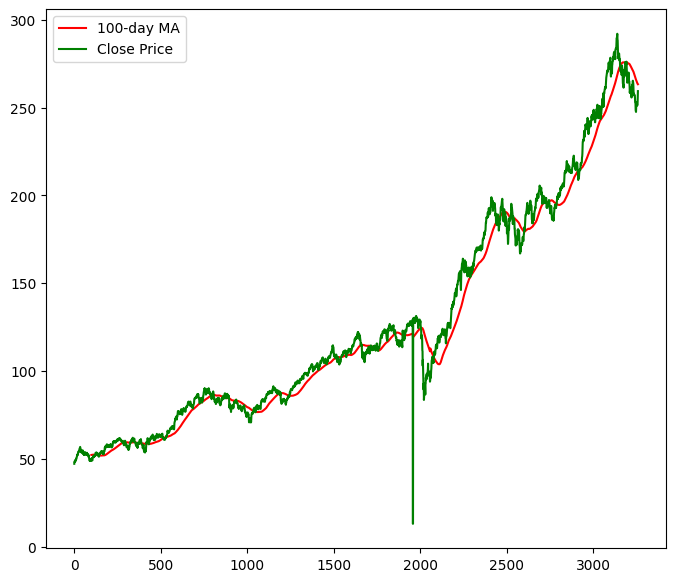

In [6]:
import sys
!{sys.executable} -m pip install matplotlib pandas


import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'data' is already defined with a 'Close' column
# If not, you would need to load your data first
# For example: data = pd.read_csv('your_stock_data.csv')

# Calculate the 100-day moving average
ma_100_days = data['Close'].rolling(window=100).mean()

# Now we can use plt functions
plt.figure(figsize=(8,7))
plt.plot(ma_100_days, 'r', label='100-day MA')
plt.plot(data.Close, 'g', label='Close Price')
plt.legend()
plt.show()

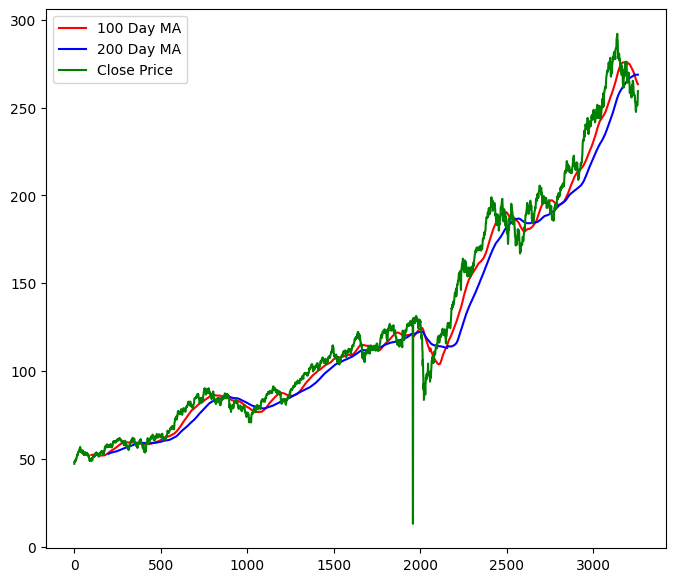

In [7]:
import sys
!{sys.executable} -m pip install pandas matplotlib


import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' contains your stock price data
# If 'data' is not defined, you'll need to load your data first
# For example: data = pd.read_csv('your_stock_data.csv')

# Calculate moving averages
ma_100_days = data.Close.rolling(100).mean()
ma_200_days = data.Close.rolling(200).mean()  # This was missing

# Now plot the data
plt.figure(figsize=(8, 7))
plt.plot(ma_100_days, 'r', label='100 Day MA')
plt.plot(ma_200_days, 'b', label='200 Day MA')
plt.plot(data.Close, 'g', label='Close Price')
plt.legend()
plt.show()  # Need parentheses here to actually display the 

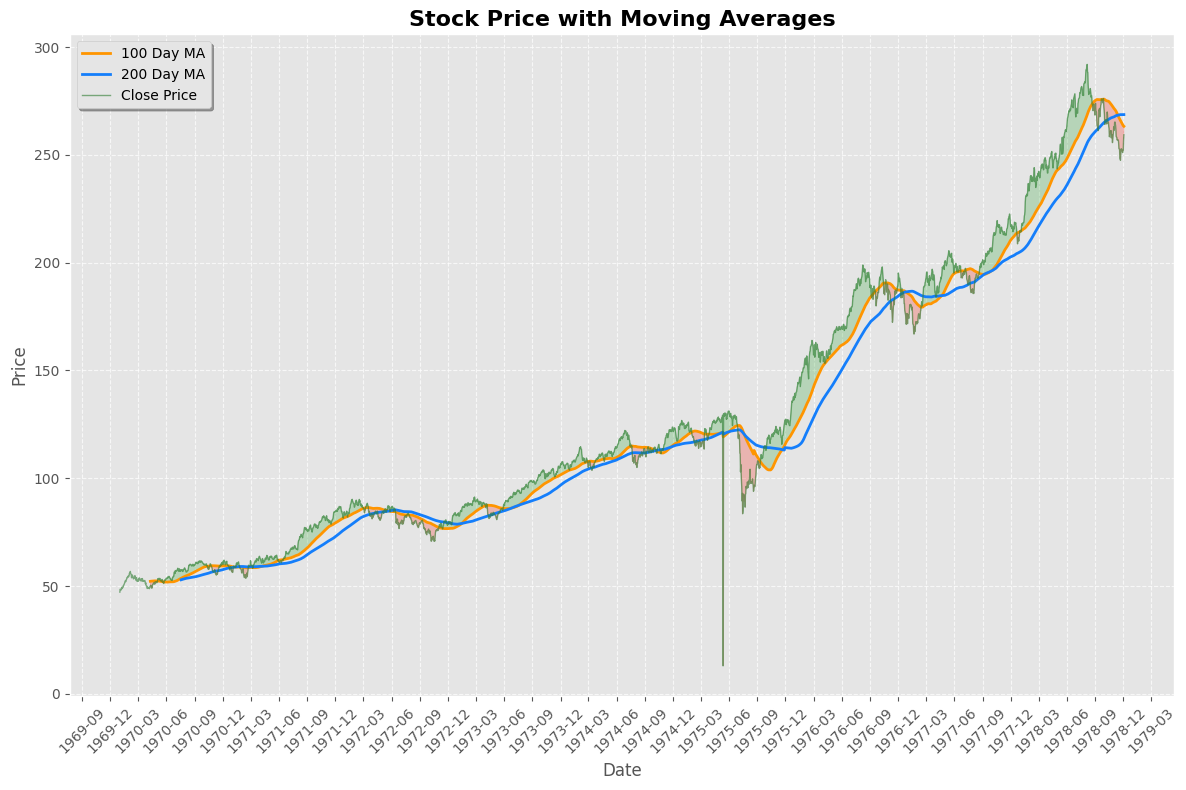

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import matplotlib.dates as mdates

# Assuming 'data' contains your stock price data
# If 'data' is not defined, you'll need to load your data first
# For example: data = pd.read_csv('your_stock_data.csv')

# Calculate moving averages
ma_100_days = data.Close.rolling(100).mean()
ma_200_days = data.Close.rolling(200).mean()

# Set the style for a more professional look
style.use('ggplot')

# Create figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Plot data with enhanced styling
ax.plot(data.index, ma_100_days, color='#FF9500', linewidth=2, label='100 Day MA')
ax.plot(data.index, ma_200_days, color='#147EFB', linewidth=2, label='200 Day MA')
ax.plot(data.index, data.Close, color='#2E7D32', alpha=0.6, linewidth=1, label='Close Price')


ax.fill_between(data.index, data.Close.values.flatten(), ma_100_days.values.flatten(), 
                where=(data.Close.values.flatten() > ma_100_days.values.flatten()), 
                color='#4CAF50', alpha=0.3)
ax.fill_between(data.index, data.Close.values.flatten(), ma_100_days.values.flatten(), 
                where=(data.Close.values.flatten() < ma_100_days.values.flatten()), 
                color='#F44336', alpha=0.3)


ax.set_title('Stock Price with Moving Averages', fontsize=16, fontweight='bold')
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Price', fontsize=12)
ax.grid(True, linestyle='--', alpha=0.7)
ax.legend(loc='best', frameon=True, fancybox=True, shadow=True)


ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.xticks(rotation=45)


plt.tight_layout()
plt.show()

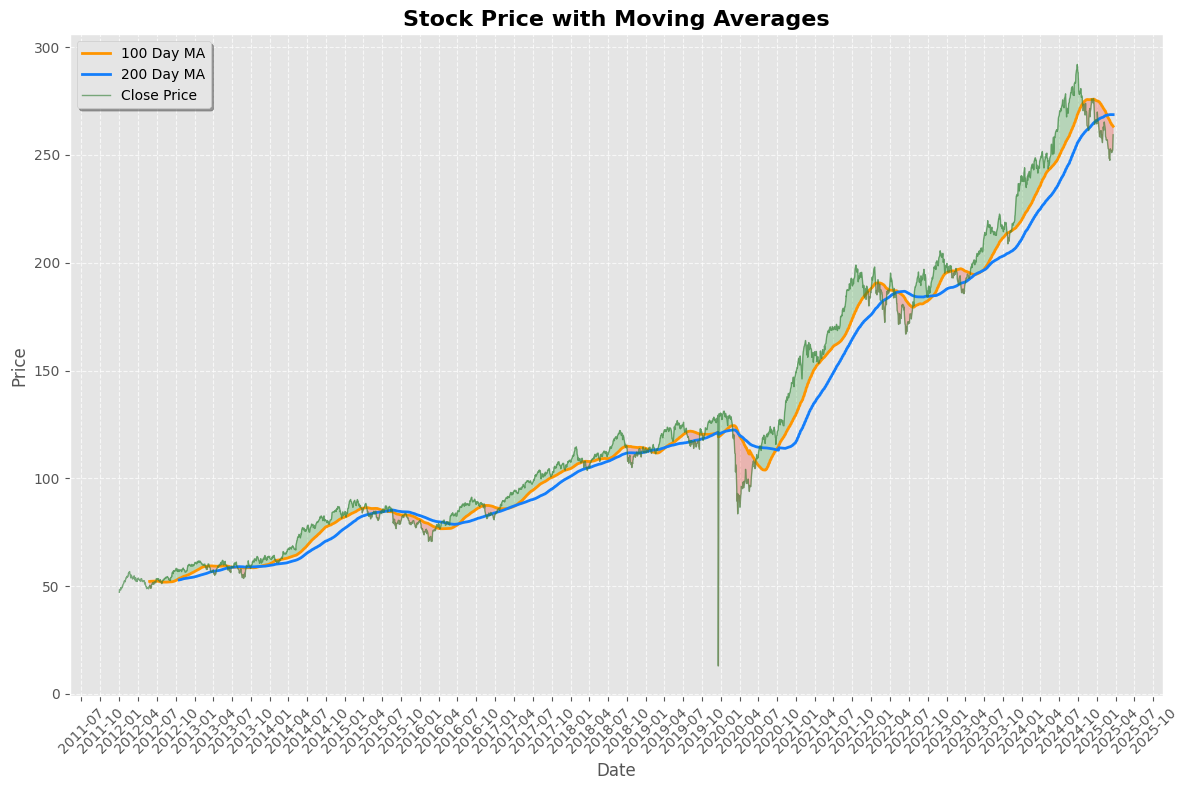

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import matplotlib.dates as mdates

# Assuming 'data' contains your stock price data
# If 'data' is not defined, you'll need to load your data first
# For example: data = pd.read_csv('your_stock_data.csv', parse_dates=['Date'], index_col='Date')

# Make sure the index is a DatetimeIndex
if not isinstance(data.index, pd.DatetimeIndex):
    # If the date column is in the dataframe but not set as index
    if 'Date' in data.columns:
        data['Date'] = pd.to_datetime(data['Date'])
        data.set_index('Date', inplace=True)
    else:
        # If we don't know which column contains dates, convert the existing index
        data.index = pd.to_datetime(data.index)

# Calculate moving averages
ma_100_days = data.Close.rolling(100).mean()
ma_200_days = data.Close.rolling(200).mean()

# Set the style for a more professional look
style.use('ggplot')

# Create figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Plot data with enhanced styling
ax.plot(data.index, ma_100_days, color='#FF9500', linewidth=2, label='100 Day MA')
ax.plot(data.index, ma_200_days, color='#147EFB', linewidth=2, label='200 Day MA')
ax.plot(data.index, data.Close, color='#2E7D32', alpha=0.6, linewidth=1, label='Close Price')

# Fill the area between close price and 100-day MA for visual emphasis
# Fixed by ensuring all arrays are 1-dimensional and using proper date handling
ax.fill_between(data.index, data.Close.values.flatten(), ma_100_days.values.flatten(), 
                where=(data.Close.values.flatten() > ma_100_days.values.flatten()), 
                color='#4CAF50', alpha=0.3)
ax.fill_between(data.index, data.Close.values.flatten(), ma_100_days.values.flatten(), 
                where=(data.Close.values.flatten() < ma_100_days.values.flatten()), 
                color='#F44336', alpha=0.3)

# Customize the plot
ax.set_title('Stock Price with Moving Averages', fontsize=16, fontweight='bold')
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Price', fontsize=12)
ax.grid(True, linestyle='--', alpha=0.7)
ax.legend(loc='best', frameon=True, fancybox=True, shadow=True)

# Format the date axis properly
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.xticks(rotation=45)

# Tight layout and show
plt.tight_layout()
plt.show()

In [10]:
def split_data(data: pd.DataFrame, train_ratio: float = 0.8) -> tuple[pd.DataFrame, pd.DataFrame]:
    """
    Split a time series dataframe into training and testing sets.
    
    Args:
        data: DataFrame containing the time series data with a 'Close' column
        train_ratio: Proportion of data to use for training (default: 0.8 or 80%)
    
    Returns:
        tuple: (training_data, testing_data) as DataFrames
    """
    # Remove rows with missing values
    clean_data = data.dropna(inplace=False).copy()
    
    # Calculate the split index
    split_idx = int(len(clean_data) * train_ratio)
    
    # Split the data
    data_train = pd.DataFrame(clean_data.Close[:split_idx])
    data_test = pd.DataFrame(clean_data.Close[split_idx:])
    
    return data_train, data_test


In [11]:
data.dropna(inplace=True)

In [12]:
data_train =pd.DataFrame(data.Close[0: int(len(data) * 0.80)])
data_test= pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [13]:
data_train.shape[0] , data_test.shape[0]

(2607, 652)

In [14]:
!{sys.executable} -m pip install scikit-learn --upgrade

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [15]:
from typing import Any, Union, List, Tuple
import numpy as np

def scale_training_data(
    data_train: Union[np.ndarray, List, Tuple], 
    scaler: Any
) -> np.ndarray:
    """
    Fit the scaler to the training data and transform it.
    
    Args:
        data_train: Training data to be scaled
        scaler: A scaler object with fit_transform method (e.g., from sklearn.preprocessing)
    
    Returns:
        np.ndarray: Scaled training data
    """
    data_train_scale = scaler.fit_transform(data_train)
    return data_train_scale

# Usage example:
# data_train_scale = scale_training_data(data_train, scaler)

In [16]:
scaler = MinMaxScaler()
data_train_scale = scale_training_data(data_train, scaler)

x = []
y = []

for i in range(200, data_train_scale.shape[0]):
    x.append(data_train_scale[i-200:i])
    y.append(data_train_scale[i, 0])

In [17]:
import numpy as np

In [18]:
x ,y = np.array(x) , np.array (y)

In [19]:
import os
os.environ['PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION'] = 'python'

In [20]:
!pip install protobuf==3.20.0
!pip install tensorflow==2.10.0

ERROR: Could not find a version that satisfies the requirement tensorflow==2.10.0 (from versions: none)
ERROR: No matching distribution found for tensorflow==2.10.0


In [21]:
import sys
print(sys.version)


3.10.18 | packaged by Anaconda, Inc. | (main, Jun  5 2025, 13:08:55) [MSC v.1929 64 bit (AMD64)]


In [22]:
import sys
!{sys.executable} -m pip install tensorflow==2.10.0 --upgrade --no-cache-dir



In [23]:
import tensorflow as tf
print(tf.__version__)


2.10.0


In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

In [25]:
model = Sequential()
model.add(LSTM(units = 50 , activation = 'relu' , return_sequences = True,
               input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60 , activation = 'relu' , return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80 , activation = 'relu' , return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120 , activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units =1))

In [26]:
model.compile(optimizer = 'adam' , loss = 'mean_squared_error')

In [28]:
model.fit(x,y, epochs = 50 , batch_size =32 , verbose =1)

Epoch 1/50
76/76 [==============================] - 36s 474ms/step - loss: 0.0092
Epoch 2/50
76/76 [==============================] - 37s 488ms/step - loss: 0.0079
Epoch 3/50
76/76 [==============================] - 37s 482ms/step - loss: 0.0077
Epoch 4/50
76/76 [==============================] - 38s 499ms/step - loss: 0.0066
Epoch 5/50
76/76 [==============================] - 39s 515ms/step - loss: 0.0064
Epoch 6/50
76/76 [==============================] - 47s 615ms/step - loss: 0.0057
Epoch 7/50
76/76 [==============================] - 49s 646ms/step - loss: 0.0061
Epoch 8/50
76/76 [==============================] - 48s 634ms/step - loss: 0.0052
Epoch 9/50
76/76 [==============================] - 52s 686ms/step - loss: 0.0053
Epoch 10/50
76/76 [==============================] - 46s 603ms/step - loss: 0.0050
Epoch 11/50
76/76 [==============================] - 49s 652ms/step - loss: 0.0047
Epoch 12/50
76/76 [==============================] - 46s 603ms/step - loss: 0.0046
Epoch 13/50
7

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 200, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 200, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 200, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 200, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 200, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 200, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [30]:
pas_100_days = data_train.tail(100) 

In [31]:
data_test = pd.concat([pas_100_days , data_test] , ignore_index=True) 

In [32]:
data_test_scale = scaler.fit_transform(data_test)

In [33]:
x = []
y= []


for i in range(200, data_test_scale.shape[0]):
   x.append(data_test_scale[i-200:i])
   y.append(data_test_scale[i,0])
x,y = np.array(x) ,np.array(y)

In [34]:
y_predict = model.predict(x)

18/18 [==============================] - 4s 201ms/step


In [35]:
scale = 1/scaler.scale_

In [36]:
y_predict = y_predict*scale

In [37]:
y = y*scale

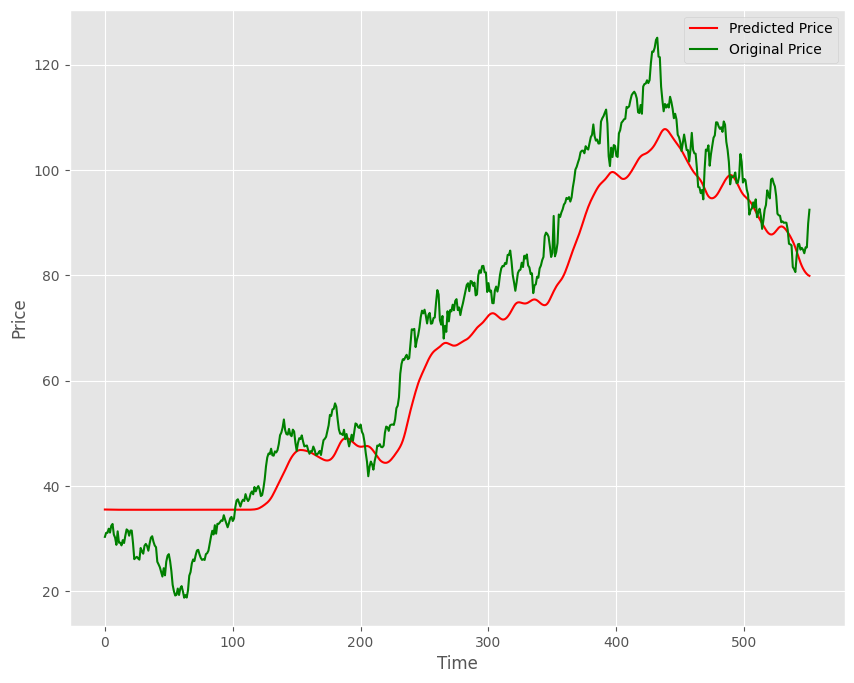

In [38]:
plt.figure(figsize = (10,8))
plt.plot(y_predict , 'r' , label = 'Predicted Price')
plt.plot(y , 'g' , label =   'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [39]:
model.save('Stock Predictions Model.keras')